In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.externals.joblib import dump
from sklearn.externals.joblib import load
from datetime import datetime

C:\Users\Windows 10\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
# Importing the Dataset
startTimeScript = datetime.now()
df = pd.read_csv('BikeSharing.csv')

In [3]:
df.head(20)

,Instant,Day,Season,Year,Month,Holiday,Weekday,Workingday,Weathersit,Temperature,Temp2,Humidity,Windspeed,Casual,Registered,Count
0,1,01-01-2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,02-01-2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,03-01-2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,04-01-2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,05-01-2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,06-01-2011,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,07-01-2011,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,08-01-2011,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,09-01-2011,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,10-01-2011,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [4]:
df.shape

(731, 16)

In [5]:
# Describing the dataset
df.describe()

,Instant,Season,Year,Month,Holiday,Weekday,Workingday,Weathersit,Temperature,Temp2,Humidity,Windspeed,Casual,Registered,Count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [6]:
df = df.drop(columns = ['Instant','Day','Year','Casual','Registered'])

In [7]:
df.head(20)

,Season,Month,Holiday,Weekday,Workingday,Weathersit,Temperature,Temp2,Humidity,Windspeed,Count
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600
5,1,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,1606
6,1,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,1510
7,1,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,959
8,1,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,822
9,1,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,1321


In [8]:
# Describing the dataset
df.describe()

,Season,Month,Holiday,Weekday,Workingday,Weathersit,Temperature,Temp2,Humidity,Windspeed,Count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,4504.348837
std,1.110807,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,1937.211452
min,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,22.000000
25%,2.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,3152.000000
50%,3.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,4548.000000
75%,3.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,5956.000000
max,4.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,8714.000000


In [9]:
df.isnull().sum()

Season         0
Month          0
Holiday        0
Weekday        0
Workingday     0
Weathersit     0
Temperature    0
Temp2          0
Humidity       0
Windspeed      0
Count          0
dtype: int64

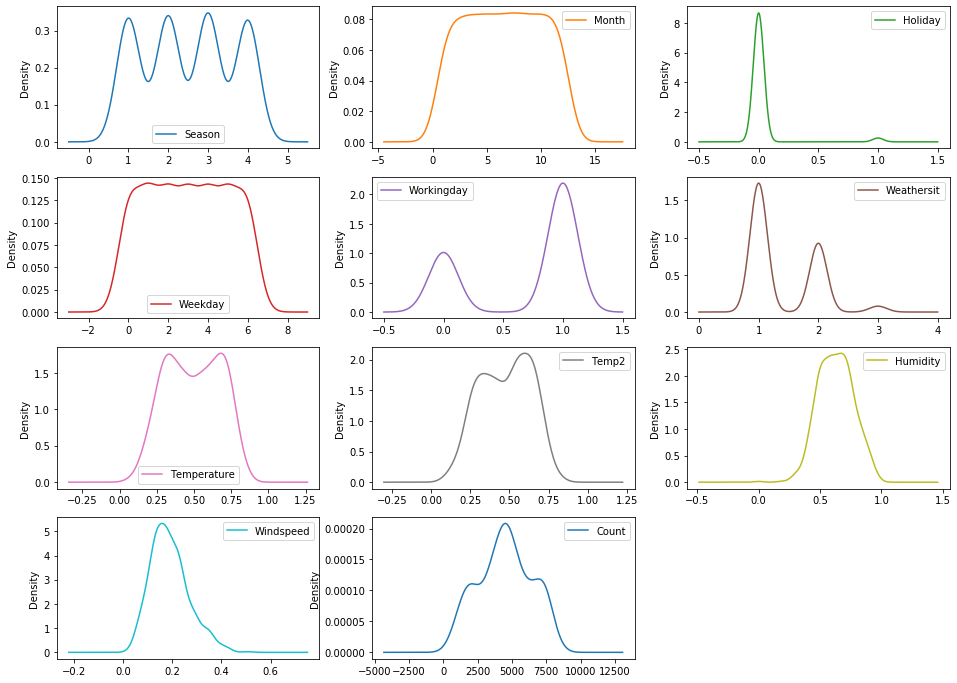

In [10]:
# Set up a variable for the total number of attribute columns (totAttr)
totCol = len(df.columns)
totAttr = totCol-1

# Set up the number of row and columns for visualization display. dispRow * dispCol should be >= totAttr
dispCol = 3
if totAttr % dispCol == 0 :
    dispRow = totAttr // dispCol
else :
    dispRow = (totAttr // dispCol) + 1

df.plot(kind='density', subplots=True, layout=(dispRow,dispCol), sharex=False,figsize = (16,12))
pyplot.show()

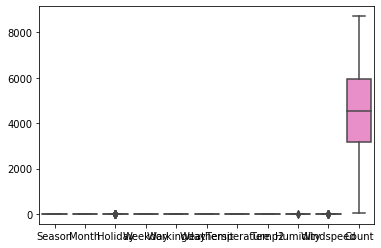

In [11]:
# Detecting outliers
sns.boxplot(data = df)

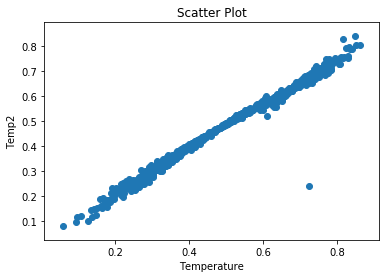

In [12]:
# Scatter plot between two variables
plt.scatter(df['Temperature'],df['Temp2'])
plt.title('Scatter Plot')
plt.xlabel('Temperature')
plt.ylabel('Temp2')
plt.show()

In [ ]:
# # Identify Outliers using Boxplot and treat them
# def detect_outlier(df):
#     for i in df.describe().columns:
#         Q1 = df.describe().at['25%',i]
#         Q3 = df.describe().at['75%',i]
#         IQR = Q3 - Q1
#         LTV = Q1 - 1.5*IQR 
#         UTV = Q3 + 1.5*IQR
#         df[i] = df[i].mask(df[i]<LTV,LTV)
#         df[i] = df[i].mask(df[i]>UTV,UTV)
#     return df


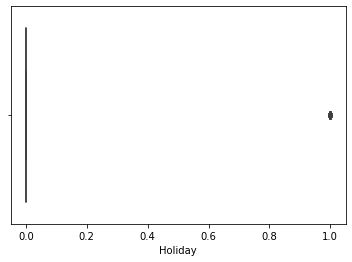

In [13]:
sns.boxplot('Holiday',data = df)

In [14]:
q1,q3 = np.percentile(df['Holiday'],[25,75])

In [15]:
IQR = q3 - q1
LTV = q1 - 1.5 * IQR
UTV = q3 + 1.5 * IQR
q1,q3,IQR,LTV,UTV

(0.0, 0.0, 0.0, 0.0, 0.0)

In [16]:
df['Holiday'] = df['Holiday'].mask(df['Holiday']>UTV,UTV)

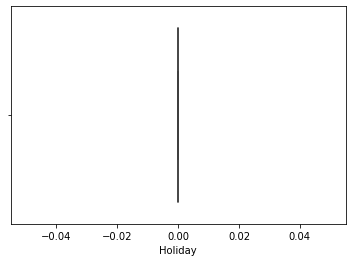

In [17]:
sns.boxplot('Holiday',data = df)

In [ ]:
sns.boxplot('Windspeed',data = df)

In [ ]:
q1,q3 = np.percentile(df['Windspeed'],[25,75])

In [ ]:
IQR = q3 - q1
LTV = q1 - 1.5 * IQR
UTV = q3 + 1.5 * IQR
q1,q3,IQR,LTV,UTV

In [ ]:
df['Windspeed'] = df['Windspeed'].mask(df['Windspeed']>UTV,UTV)

In [ ]:
sns.boxplot('Windspeed',data = df)

In [ ]:
sns.boxplot('Humidity',data = df)

In [ ]:
q1,q3 = np.percentile(df['Humidity'],[25,75])

In [ ]:
IQR = q3 - q1
LTV = q1 - 1.5 * IQR
UTV = q3 + 1.5 * IQR
q1,q3,IQR,LTV,UTV

In [ ]:
df['Humidity'] = df['Humidity'].mask(df['Humidity']<LTV,LTV)

In [ ]:
sns.boxplot('Humidity',data = df)

In [ ]:
# out = detect_outlier(df)
# out.head()

In [ ]:
# Treated outliers
sns.boxplot(data = df)

In [ ]:
df['Season'].unique()

In [ ]:
df['Month'].unique()

In [ ]:
df['Holiday'].unique()

In [ ]:
df['Weekday'].unique()

In [ ]:
df['Workingday'].unique()

In [ ]:
df['Weathersit'].unique()

### Data Visualization

In [ ]:
correlations = df.corr()

In [ ]:
# Correlation Matrix of Dataset
plt.figure(figsize=(10,8))
correlations = correlations * 100
sns.heatmap(correlations,annot = True,fmt = '.0f')

In [ ]:
#df = df.drop(columns = ['Temp2','Month'])

In [ ]:
df.head()

In [ ]:
df.hist(xrot = -45,figsize = (15,15))
pyplot.show()

In [ ]:
dummy_fields = ['Season','Weathersit','Holiday','Weekday']
for each in dummy_fields:
    dummies = pd.get_dummies(df[each],prefix = each,drop_first = False)
    df = pd.concat([df,dummies],axis = 1)
fields_to_drop = ['Season','Weathersit','Holiday','Weekday']
df = df.drop(fields_to_drop,axis = 1)
df.head()

In [ ]:
df.shape

In [ ]:
df['Cnt'] = df['Count']

In [ ]:
df.drop(['Count'],axis = 1,inplace = True)

In [ ]:
df.rename(columns = {'Cnt':'Count'},inplace = True)

In [ ]:
df.head()

In [ ]:
sns.countplot(df['Workingday'])

## Modelling

In [ ]:
seedNum = 777
totCol = len(df.columns)
array = df.values
X_train = array[:,0:totCol-1]
Y_train = array[:,totCol-1]
# totCol = len(testDataset.columns)
# array = testDataset.values
# X_validation = array[:,0:totCol-1]
# Y_validation = array[:,totCol-1]

print("X_train.shape: {} Y_train.shape: {}".format(X_train.shape, Y_train.shape))
# print("X_validation.shape: {} Y_validation.shape: {}".format(X_validation.shape, Y_validation.shape))
print ('Total time for data handling and visualization:',(datetime.now() - startTimeScript))

In [ ]:
X_tr = pd.DataFrame(X_train)

In [ ]:
X_tr

In [ ]:
X_train

In [ ]:
# # Data Standardization
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)

In [ ]:
# Run algorithms using 10-fold cross validation
from sklearn.metrics import make_scorer,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
num_folds = 10
scoring = make_scorer(mean_squared_error)
seedNum = 777
models = []
models.append(('LR', LogisticRegression(random_state=seedNum)))
models.append(('CART', DecisionTreeRegressor(random_state=seedNum)))
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('SVM', SVC(random_state=seedNum)))
models.append(('RF', RandomForestRegressor(random_state=seedNum)))
models.append(('AB', AdaBoostRegressor(random_state=seedNum)))
models.append(('GBM', GradientBoostingRegressor(random_state=seedNum)))
results = []
names = []
metrics = []

In [ ]:
# Generate model in turn
from math import sqrt
for name, model in models:
    startTimeModule = datetime.now()
    kfold = KFold(n_splits=num_folds, random_state=seedNum)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    metrics.append(cv_results.mean())
    error = sqrt(cv_results.mean())
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    print ('Model training time:',(datetime.now() - startTimeModule))
    print('RMSE value is :',error)

In [ ]:
# Spot Check Algorithms

fig = pyplot.figure()
fig.suptitle('Algorithm Comparison - Spot Checking')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [ ]:
##Divide the data as train & test using train test split with test as 0.25 size
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_train,Y_train,test_size=0.20,random_state=1)

In [ ]:
#R2 score for each algorithms
for name, model in models:
    model.fit(X_train,Y_train)
    
    # Predicting the Test results
    Y_pred = model.predict(X_test)
    
    from sklearn.metrics import r2_score
    r2_score = r2_score(Y_test,Y_pred)
    msg = 'R2 Score for %s is :%f' %(name,r2_score)
    print(msg)

In [ ]:
# Tuning algorithm #1 - AdaBoost
startTimeModule = datetime.now()
paramGrid4 = dict(n_estimators=np.array([500,600,700]))
model4 = AdaBoostRegressor(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid4 = GridSearchCV(estimator=model4, param_grid=paramGrid4, scoring=scoring, cv=kfold)
grid_result4 = grid4.fit(X_train, Y_train)

In [ ]:
print("Best: %f using %s" % (grid_result4.best_score_, grid_result4.best_params_))
results.append(grid_result4.cv_results_['mean_test_score'])
names.append('AB')
means = grid_result4.cv_results_['mean_test_score']
stds = grid_result4.cv_results_['std_test_score']
params = grid_result4.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print ('Model training time:',(datetime.now() - startTimeModule))

In [ ]:
# Tuning algorithm #2 - RandomForestRegressor
startTimeModule = datetime.now()
paramGrid5 = dict(n_estimators=np.array([500,600,700]))
model5 = RandomForestRegressor(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid5 = GridSearchCV(estimator=model5, param_grid=paramGrid5, scoring=scoring, cv=kfold)
grid_result5 = grid5.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result5.best_score_, grid_result5.best_params_))
results.append(grid_result5.cv_results_['mean_test_score'])
names.append('GBM')
means = grid_result5.cv_results_['mean_test_score']
stds = grid_result5.cv_results_['std_test_score']
params = grid_result5.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print ('Model training time:',(datetime.now() - startTimeModule))

In [ ]:
# Compare Algorithms After Tuning
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison - Post Tuning')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()